In [8]:
import pandas as pd

In [9]:
co=pd.read_csv('aggregate_covid_country.csv',parse_dates=['Date'])

In [10]:
co

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [11]:
co.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [13]:
co_dates=pd.DataFrame()
co_dates['month']=co['Date'].dt.month_name()
co_dates['year']=co['Date'].dt.year
co_dates['day']=co['Date'].dt.day_name()
co_dates['Deaths']=co['Deaths']
co_dates

,month,year,day,Deaths
0,January,2020,Wednesday,0
1,January,2020,Wednesday,0
2,January,2020,Wednesday,0
3,January,2020,Wednesday,0
4,January,2020,Wednesday,0
...,...,...,...,...
23683,May,2020,Tuesday,3
23684,May,2020,Tuesday,1
23685,May,2020,Tuesday,49
23686,May,2020,Tuesday,7


In [14]:
import numpy as np
co_dates['type_of_day']=np.where((co_dates['day']=='Sunday')|(co_dates['day']=='Saturday'),'weekend','weekday')

In [15]:
co_dates

,month,year,day,Deaths,type_of_day
0,January,2020,Wednesday,0,weekday
1,January,2020,Wednesday,0,weekday
2,January,2020,Wednesday,0,weekday
3,January,2020,Wednesday,0,weekday
4,January,2020,Wednesday,0,weekday
...,...,...,...,...,...
23683,May,2020,Tuesday,3,weekday
23684,May,2020,Tuesday,1,weekday
23685,May,2020,Tuesday,49,weekday
23686,May,2020,Tuesday,7,weekday


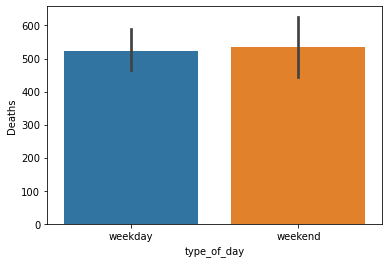

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.barplot(x='type_of_day',y='Deaths',data=co_dates)

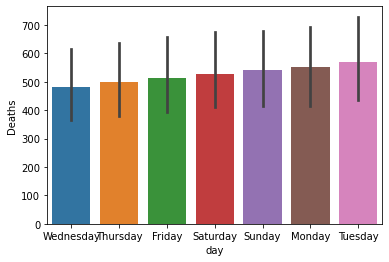

In [21]:
import matplotlib.pyplot as plt
sns.barplot(x='day',y='Deaths',data=co_dates)
plt.show()

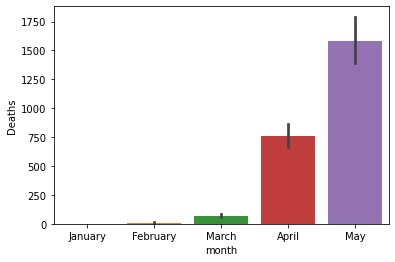

In [22]:
sns.barplot(x='month',y='Deaths',data=co_dates)
plt.show()

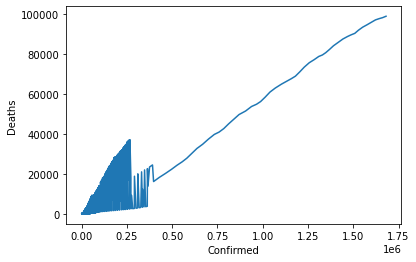

In [30]:
sns.lineplot(x='Confirmed',y='Deaths',data=co)
plt.show()

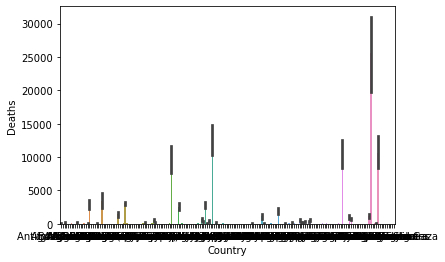

In [31]:
sns.barplot(x='Country',y='Deaths',data=co)
plt.show()

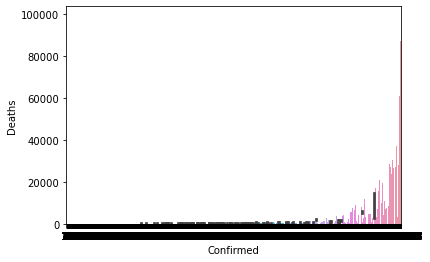

In [59]:
sns.barplot(x='Confirmed',y='Deaths',data=co)
plt.show()

In [33]:
co.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [34]:
co.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [35]:
co_x=co.drop(columns=['Date','Country'])
y=pd.DataFrame(co['Deaths'])

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(co_x)
x=pd.DataFrame(x,columns=co_x.columns)

In [37]:
x

,Confirmed,Recovered,Deaths
0,-0.136415,-0.170497,-0.131974
1,-0.136415,-0.170497,-0.131974
2,-0.136415,-0.170497,-0.131974
3,-0.136415,-0.170497,-0.131974
4,-0.136415,-0.170497,-0.131974
...,...,...,...
23683,-0.129072,-0.146393,-0.131222
23684,-0.136261,-0.170101,-0.131723
23685,-0.132153,-0.169837,-0.119701
23686,-0.120667,-0.148308,-0.130220


In [39]:
x.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [40]:
coc=co.corr()

In [41]:
coc

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


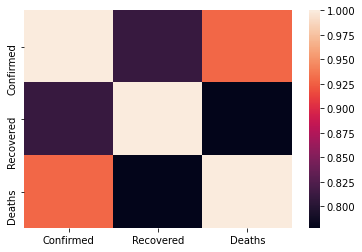

In [42]:
sns.heatmap(coc)

In [46]:
for col in x.columns:
    if x.skew().loc[col]>0.50:
        x[col]=np.log1p(x[col])

In [47]:
x.skew()

Confirmed    6.204811
Recovered    5.551030
Deaths       6.896523
dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [49]:
lm=LinearRegression()

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.22)

In [52]:
lm.fit(x_train,y_train)

LinearRegression()

In [53]:
lm.score(x_train,y_train)

0.8020199389679015

In [54]:
pred=lm.predict(x_test)
pred

array([[-206.77622107],
       [-206.48097363],
       [-206.77622107],
       ...,
       [-206.70240701],
       [-205.72079107],
       [-206.73172618]])

In [55]:
print(r2_score(y_test,pred))

0.8011549562150939


In [56]:
print('error:')
print('mean absolute error:', mean_absolute_error(y_test,pred))
print('mean squared error:', mean_squared_error(y_test,pred))

print('root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 464.6533090439634
mean squared error: 3366349.489945771
root mean squared error: 1834.7614258932335


In [57]:
import joblib
joblib.dump(lm,'lm_world happiness_score.obj')

['lm_world happiness_score.obj']